In [7]:
import pandas as pd
from matplotlib import pyplot as plt

In [6]:
courses = pd.read_csv('../data/courses.csv').dropna(subset=['course_published_at_local']).sort_values(by=['course_published_at_local'])
courses[:10]

,course_id,course_name,course_price,teacher_id,teacher_intro,groups,sub_groups,groups+subgroups,topics,course_published_at_local,description,will_learn,required_tools,recommended_background,target_group
1,54d5a117065a7e0e00725ac0,幾何圖形分割 X 色塊組合,100,54d5a079065a7e0e00725abe,從學生時代開始摸索photoshop等軟體，自以為有些天賦但後來發現其實沒有。出社會後從事美...,"藝術,設計","平面設計,繪畫與插畫","設計_平面設計,藝術_繪畫與插畫","Illustrator/以拉,配色技巧",42090.98472,"<img src=""https://storage.googleapis.com/hahow...",可以將任何區塊分割成自己想要的幾何圖形、快速的上色，並且能夠應用在許多地方,"Adobe Illustrator（必備）, camera",知道如何使用Illustrator的基本工具列,每一位興趣的人都能學得來，非常容易的小技巧
2,54d5d9952246e60a009ec571,數位拼貼的手感,300,54cb5c2ea784960a00948678,自由工作者，致力於品牌視覺規劃，包含識別系統設計、平面設計、包裝設計、網頁、插畫製作等，偶爾...,"藝術,設計","平面設計,電腦繪圖","設計_平面設計,藝術_電腦繪圖",photoshop,42090.98472,<p>拼貼是視覺設計的表現方法之一，可應用在海報、書籍、喜帖、筆記本等各式平面設計，甚至，你...,藉由這堂課，可以學習到如何利用身邊的物件自製素材，了解去背、Photoshop的基本操作，並...,軟體：Adobe Photoshop、Adobe Illustrator；\n設備：電腦、相...,NaN,繪圖軟體初學者；喜歡隨性創作；常天馬行空；喜歡剪剪貼貼或收集東西，卻不知該如何收藏。
3,54d7148a2246e60a009ec588,Line 的貼圖自己動手做！,185,54d713532246e60a009ec586,我是Danny，現是一名自由接案的插畫師，主要是做插畫設計、人物設計、App UI設計，20...,"藝術,設計","平面設計,應用設計,電腦繪圖","設計_平面設計,設計_應用設計,藝術_電腦繪圖","LINE 貼圖設計,photoshop",42090.98472,<ul><li><p>許多人的電腦繪圖第一個開始使用的軟體都是photoshop，主要是因為...,如果上完課之後好好練習(不懂的地方隨時提問)，就可以畫出你在一般市面上看的到的line貼圖(...,Photoshop(可至官網下載試用版),只要手可以拿得起鉛筆和握滑鼠就可以,喜歡畫畫，但是沒有學過電腦繪圖的人、想學基本的電腦繪圖但不知如何入手的人，從10歲-100歲...
4,5513e92b38239d10005778e1,為申請學校或工作寫好英文自傳,600,5513e92438239d10005778df,在北美長大，回到南台灣尋根後，現落腳於南加州的庄腳嬰仔。在鑽研細胞奈米科學與皮膚再生醫學的過...,"職場技能,語言","求職,英文","語言_英文,職場技能_求職","商用英文,履歷撰寫",42144.83056,"<p>大家好，我是Hans, 想多了解我的朋友，可以從""老師的自我介紹""知道更多。我很期待能...","A personal statement that you can be proud of,...",Google Doc will be used to submit/share your a...,How to use Google Doc. Basic English listening...,People applying for college/post-graduate stud...
5,55307d94d530a90a00a3a896,糖果娃娃 - 學校畢業紀念娃娃,150,55307ad9d530a90a00a3a88f,我是棋茵chyin老師，是DⅠY專業出版社負責人、總編輯也是DⅠY手藝作家! 編輯出版的DⅠ...,手作,手作小物,手作_手作小物,手作小物,42149.00139,<p>隨著畢業季的到來，棋茵老師要教大家如何用簡單的材料、方法，做出獨一無二的畢業紀念娃娃！...,NaN,材料包購買連結：http://www.chyin.com.tw/product-info.a...,NaN,NaN
6,551a6be023774e0a001eb20c,療癒感手繪插畫食譜,200,5514db1438239d1000577911,很難明確的表達自己有多喜歡畫畫，從還不懂事的時候就開始畫圖，即使現在一般用電腦做設計還是離不...,藝術,繪畫與插畫,藝術_繪畫與插畫,食物插畫,42149.51597,<p>如何能讓做菜變得更有趣又容易呢？那就是自製一套屬於自己的食譜了！透過插畫的形式將困難的...,1.整理文字表達的意思並以插圖方式轉化為好懂的圖像、圖解。\n2.畫出一套自己的食譜，增加學...,鉛筆、橡皮擦、水性原子筆、色鉛筆（非必需）,NaN,1.喜愛料理的人，希望把自己料理的方法用插圖方式呈現，整理成自己獨一無二的食譜！\n2.對料...
7,551171a938239d1000577864,教你用免費軟體 混音組曲當 DJ！,1000,54f5c694e977de0a00d46a06,"我是DJ Ken Lin, 7年級前段班, 相信好聽的音樂不分種類語言, 並將理想落實在現實...",音樂,"DJ,更多音樂","音樂_DJ,音樂_更多音樂",DJ,42152.96736,"<p><img src=""https://storage.googleapis.com/ha...","可以做出一段組曲(DJ Set), 長度從 20分鐘甚至到90分鐘, 把自己喜歡的舞曲接在一...","電腦 (Mac or PC) , 耳機, VirtualDJ Home (網站可以免費下載)",只要喜歡舞曲即可！,想要成為DJ卻不知道該如何開始的人，上完這堂課你就學會用滑鼠接歌了！
8,54f1268f4ec3c809002e4a29,不一樣的西洋美術史,588,54de6f88dbc18009004c1605,筱筑。artist。繪畫。攝影。\n\n藝術之所以美好，是因為有人的溫度。,藝術,更多藝術,藝術_更多藝術,更多藝術,42153.63472,<blockquote>課程售價調整公告</blockquote><p>本課程將於 2020...,希望學生可以找到自己的方法去欣賞藝術作品。\n在了解美術史的大概架構之後，不管在美術館看到什...,一顆好奇的心、一雙明亮的眼睛,無需背景知識,想要了解西洋藝術史的人；想要逛美術館卻不知從何看起的人；覺得藝術的世界很神祕的人；想要看懂抽...
9,55599687dfe21b0a00e776d9,法式繽紛馬卡龍,500,55599679dfe21b0a00e776d7,Hi~ 我是Puki。我是個貪吃鬼、是愛做菜的小廚娘、是個勇於追夢的夢想家。最大夢想就是吃遍...,生活品味,烹飪料理與甜點,生活品味_烹飪料理與甜點,烹飪料理,42194.00139,<h4>在看影片之前......</h4><p>大家好，我是Puki！我的專長就是教大家做出...,基礎的法式馬卡龍 & 巧克力甘拿許內餡,電動攪拌機、刮刀、攪拌盆、碗、篩網、擠花袋或三明治袋(塑膠袋也可以)、圓型花嘴(建議使用)、...,只需要一顆熱情的心和喜愛學習的精神,各種年齡層的人，不分男女
10,559e49185850311000fca504,超 EAZY！在家初學的紓壓瑜伽,199,559e49105850311000fca503,哈囉！我是花花老師，瑜伽教學經驗超過七年，擅長各種傳統瑜伽、伸展操、瑜伽結合皮拉提斯等。\n...,生活品味,"壓力舒緩,更多生活品味,運動","生活品味_壓力舒緩,生活品味_更多生活品味,生活品味_運動","壓力舒緩,瑜珈",42202.00000,<p>想上瑜伽又怕筋骨太硬無法持之以恆嗎？這堂課就是為初學者設計，動作簡單輕易上手，沒有複雜...,NaN,NaN,NaN,NaN


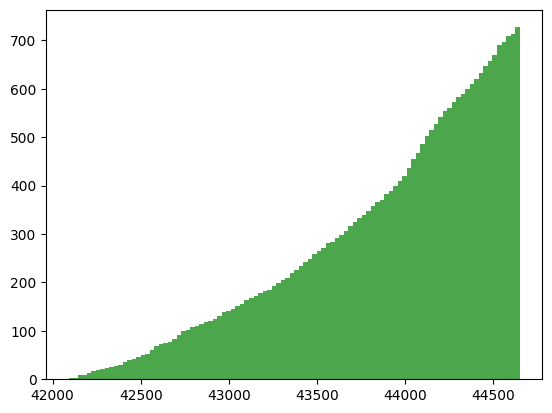

In [23]:
num_bins = 100
n, bins, patches = plt.hist(courses['course_published_at_local'].to_list(), num_bins,color ='green',alpha = 0.7, cumulative=True)

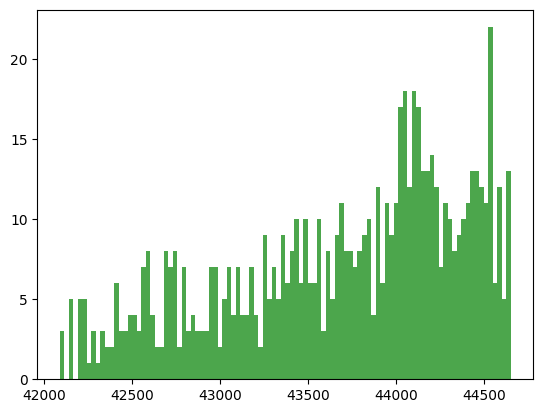

In [24]:
n, bins, patches = plt.hist(courses['course_published_at_local'].to_list(), num_bins,color ='green',alpha = 0.7)

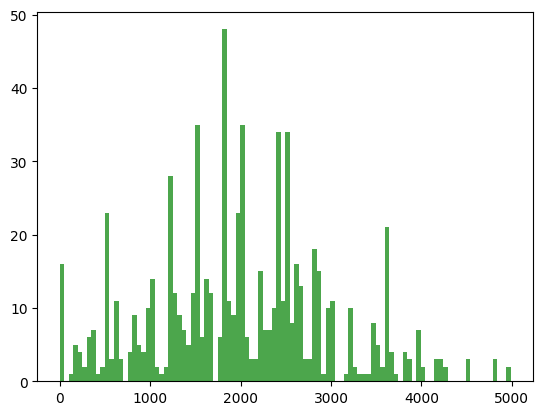

In [27]:
n, bins, patches = plt.hist([x for x in courses['course_price'].to_list() if x <= 5000], num_bins,color ='green',alpha = 0.7)

In [29]:
train_csv = pd.read_csv('../data/train.csv')
train_csv

,user_id,course_id
0,5bdecbfffec014002166796a,5f194354cad0d086f3ee24cf
1,5fedf958af850a915c86362c,5bfd47782d018e0020e4b0e4 5fc4a352d375951a03cc0...
2,5fd255c43136a460c6f3f930,598053e0acc137070007186a 6031136edd9bc1681035b892
3,5a0bde2aa15b3f001e98429a,5fc5ed671be929537e5283bb 5fc5edae001c9102feab8...
4,5fedf8132a0eb0bfab27882b,5e8e9d3c5a140c3d1e1c5245
...,...,...
59732,6114c700aa04ce00067265a5,61034f3d4ef8b500067afc1c
59733,60e66f29be3e3b0006c4db75,55ae208a7b4d9910001198f2
59734,60e2b05ee742c300072ff5b3,600538ff0cf6c91168243a88
59735,60da0995947dfc0fb61ef296,5edf464fb54d0f59f0e7d96a


In [36]:
course_price = {}
for (course, price) in zip(courses['course_id'].to_list(), courses['course_price'].to_list()):
    course_price[course] = price
course_price

TypeError: unhashable type: 'slice'

In [39]:
for user, course in zip(train_csv['user_id'].to_list(), train_csv['course_id'].to_list()):
    m = 0
    for c in course.split(' '):
        p = course_price[c]
        if(p > m):
            m = p
    print(user, m)
            

5bdecbfffec014002166796a 2250
5fedf958af850a915c86362c 4230
5fd255c43136a460c6f3f930 2580
5a0bde2aa15b3f001e98429a 0
5fedf8132a0eb0bfab27882b 2400
5f5d9e4920a34fbd95fdbd23 0
5b8e7ed6de22ba001ee7acfb 3400
5bb0de3cc3964c001eec52a7 3800
5fe42590e810e1085785e967 1800
5fee0188af850aeca8864127 0
5ecd1a1c26ed1a9adb56bb2c 3490
5f648b392c90b1cc4b59e889 0
5fb3d9e7c912735f77c1204d 0
5b4a3511df9c8d001ed2c402 3680
59c91b06cecf8d001e687579 1300
5df22d64a5ee510022a0516f 3680
5fee0949af850a86c6864c30 650
5a8fb7d944a1e4001eee4afd 0
5f58d8994ea18e18f28fbda6 3800
58f0f5b94909c907004abd94 3680
5fe9edae6ea6b65d6d85e1bd 650
54fc83874c443209007ab271 1960
59f5295fe8c1dd001e90a7e4 1200
5efd80c26fd4cc66d6d2aa47 0
59f8c9a3e8c1dd001e90cf9d 3600
5fc07d6a18ab694734e34f9c 3680
5be2dd9d870dcd00200bdce9 0
5fee2d66af850a32d7867ec0 1900
5714dc23234ded0a00a40f61 3490
5c8667321a21560020ec73ad 0
5fe2ebb5332acc5303a7595d 3288
5f14ab06cad0d0f048ea33d8 3680
5876585358ab57070085be60 2980
5edc6cd859a68e9996bacfd1 0
5f90c2e770a3